<a href="https://colab.research.google.com/github/rushikeshlatad/Telecom_churn_analysis/blob/main/EDA_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name -** Telecom Churn Analysis

*   Project Type - EDA
*   Contribution - Individual
*   Member Name - Rushikesh Latad

#**Project Summary -**

In this project we have Orange telecom's churn dataset. Orange S.A. formerly France Telecom S.A., is a french multinantional telecommunications corporation. This dataset consists of a cleaned customer activity data, along with a churn label specifying wheather a customer cancelled the subscription. Our task was to analyze the data and give the recommendations to deal with the problem.
 At first we checked the data weather it is properly cleaned or not, then started exploratory data analysis in which we performed univariate analysis then bivariate analysis and then multivariate analysis and found out that there are some states where churned rate is very high i.e. around 25% of customers in those states are churning then we also found out that the major reson behind churning is highe service centre calls and having international plan has also significant impact on churning.

###**GitHub Link -**

#**Problem Statement**

we need to explore and analyze the data to discover the key factors resposible for the customer churn and come up with recommendations to ensure customer retentions.

###**Define Your Business Objective?**

The Business objective of this project is to reduce the churn rate of the customers

###**Hypothesis/Assumptions**

Before exploring and analysing the data we will take assumptions on the reason behind the churn.

*   High customer service calls that means customers are facing problem which leads to churn
*   High charge per minute which leads to churn



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
telecom_df = pd.read_csv('/content/drive/MyDrive/EDA project Telecom churn dataset/Telecom Churn.csv')

In [ ]:
telecom_df.head()   #first look of dataset/first five observations

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telecom_df.shape

(3333, 20)

There are 3333 rows and 20 columns.

In [ ]:
#checking all the columns in our dataset
telecom_df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

###**Dataset Information**

*   State  -  51 unique states in united states of america
*   Account length  -  Days for which the account was active
*   Area code  -  415: San francisco, 408: San jose, 510: City of Oakland
*   International plan  -  Yes indicates international plan is present No       indicates no international plan
*   Voice mail plan  -  Yes indicates plan is present No indicates plan is not present
*   Number vmail messages  -  Number of voice mail messages ranging 0-50
*   Total day minutes  -  Total no. of minutes spent by customer in morning
*   Total day calls  -  Total calls done by customers in morning
*   Total day charge  -  Total charge to the customer in the morning
*   Total eve minutes  -  Total no. of minutes spent by customer in evening
*   Total eve calls  -  Total calls done by customers in evening
*   Total eve charge  -  Total charge to the customer in the evening
*   Total night minutes  -  Total no. of minutes spent by customer in night
*   Total night calls  -  Total calls done by customers in night
*   Total night charge  -  Total charge to the customer in the night
*   Total intl minutes  -  Total no. of minutes spent by customer on international call
*   Total intl calls  -  Total international calls done by customers
*   Total intl charge  -  Total internatinal charge to the customer 
*   Customer service calls  -  No. of times customers call to service centre
*   Churn  -  True indicates custmer has churned the service and False indicates customer has not churned the service.

In [ ]:
telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

There are 8 int64 dtype columns, 8 float64 dtype columns, 3 object dtype columns and 1 bool dtype column.

In [ ]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


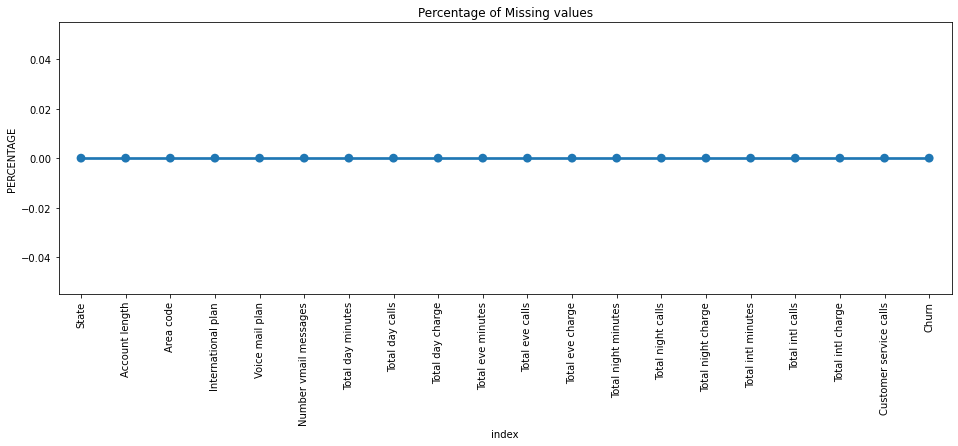

In [ ]:
#CHECKING NULL VALUES
missing_df = pd.DataFrame((telecom_df.isnull().sum())*100/telecom_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing_df)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#checking duplicates
len(telecom_df[telecom_df.duplicated()])

0

In [ ]:
telecom_df.describe(include= 'all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


from the above description of the data we can see that there are 3 object type columns and 1 boolian type column, to get better insights and better interpretation of data we can convert 2 object type columns( 'International plan' and 'Voice mail plan') and 1 boolian type column i.e. 'Churn' into catogorical integer column by replacing 'Yes' and 'True' with '1' and 'No' and 'False' with '0'.

In [ ]:
telecom_df['International plan'] = telecom_df['International plan'].replace({'Yes':'1', 'No':'0'}, regex = True).astype(int) #replacing yes with 1 and no with 0
telecom_df['Voice mail plan'] = telecom_df['Voice mail plan'].replace({'Yes':'1', 'No':'0'}, regex = True).astype(int)  #replacing yes with 1 and no with 0
telecom_df['Churn'] = telecom_df['Churn'].replace({'True':'1', 'False':'0'}, regex = True).astype(int)  #replacing true with 1 and false with 0

In [ ]:
telecom_df.head()  #updated dataframe

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Separate the list of Numeric and categorical columns

In [ ]:
Numerical_featuress = telecom_df.columns.drop(['State','Area code','International plan','Voice mail plan','Customer service calls','Churn'])
Numerical_featuress
catogorical_features =  telecom_df.columns.drop(['Account length', 'Number vmail messages', 'Total day minutes',  #including those varaible which has less unique values
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes','Total intl calls', 'Total intl charge'])
print('telecom_df has {} numerical columns: {}'.format(len(Numerical_featuress),Numerical_featuress))
print('telecom_df has {} categorical columns: {}'.format(len(catogorical_features),catogorical_features))

telecom_df has 14 numerical columns: Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge'],
      dtype='object')
telecom_df has 6 categorical columns: Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Customer service calls', 'Churn'],
      dtype='object')


#**Univariate analysis**
*   This form of analysis is for analysing single variable 



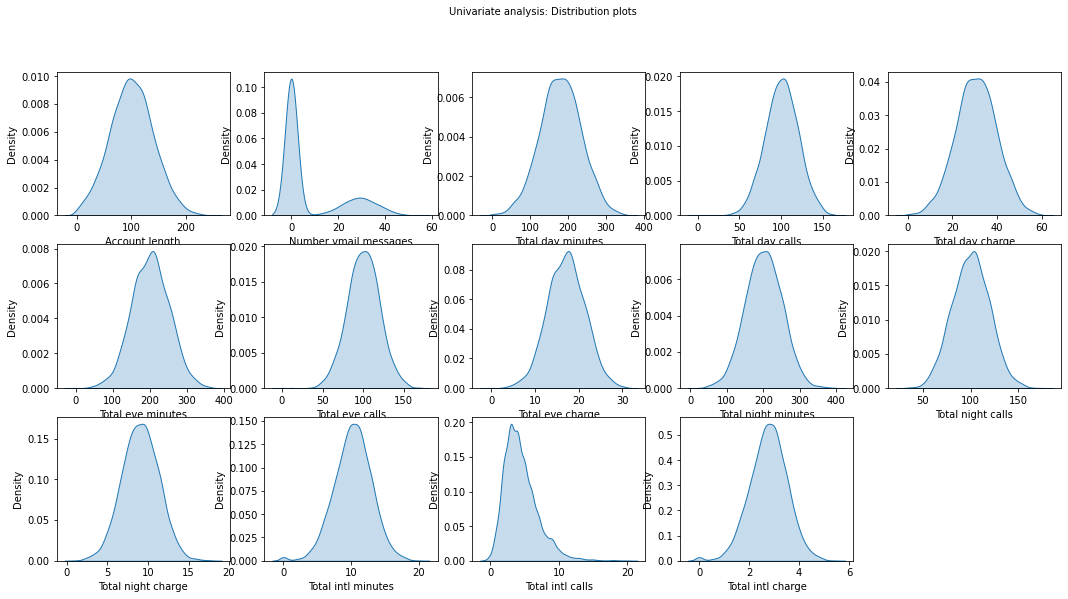

In [ ]:
plt.figure(figsize=(18,9))
plt.suptitle('Univariate analysis: Distribution plots', fontsize=10)
for i in range(0, len(Numerical_featuress)):
  plt.subplot(3,5,i+1)
  sns.kdeplot(x=telecom_df[Numerical_featuress[i]],fill=True)

Conclusins from the above plot 

*   Most of the variables are symmentrical about their mean and there is no skewness except plot of number vmail messages and total intl calls.
*   most of the customers has 0 number of vmail messages.
*   most of the customers has less than 10 internationl calls
*   There are few customers who have zero total intl minutes and total intl charges





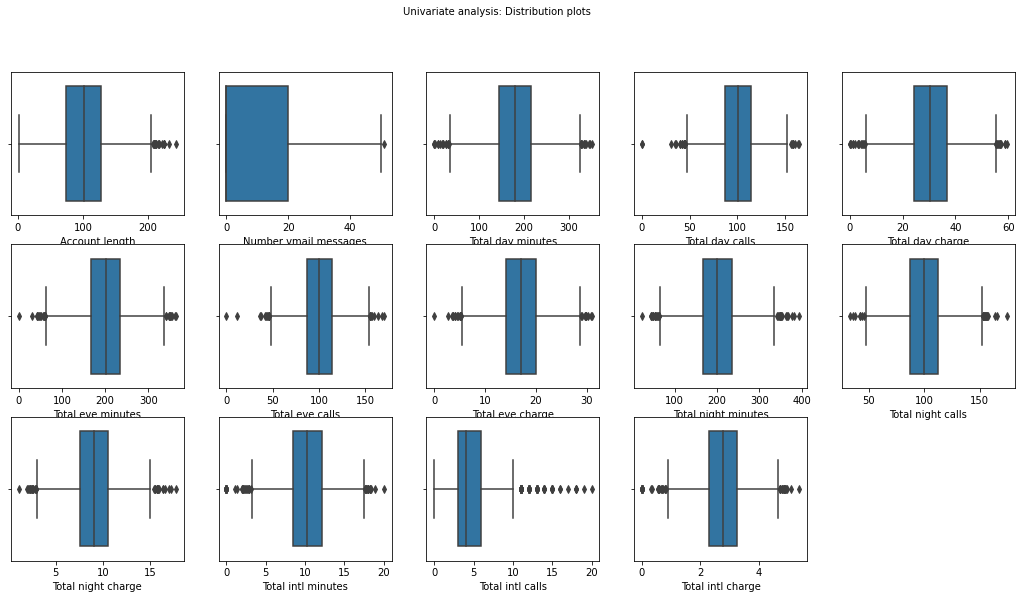

In [ ]:
plt.figure(figsize=(18,9))
plt.suptitle('Univariate analysis: Distribution plots', fontsize=10)
for i in range(0, len(Numerical_featuress)):
  plt.subplot(3,5,i+1)
  sns.boxplot(x=telecom_df[Numerical_featuress[i]])

From the above boxplot we can see that their are some outliers but there not any or very few anamolies, so we will not remove or replace this outliers with mean or mode. Because we assume that by keeping this outliers we can analyise the data better it will be easy for our business objective.  

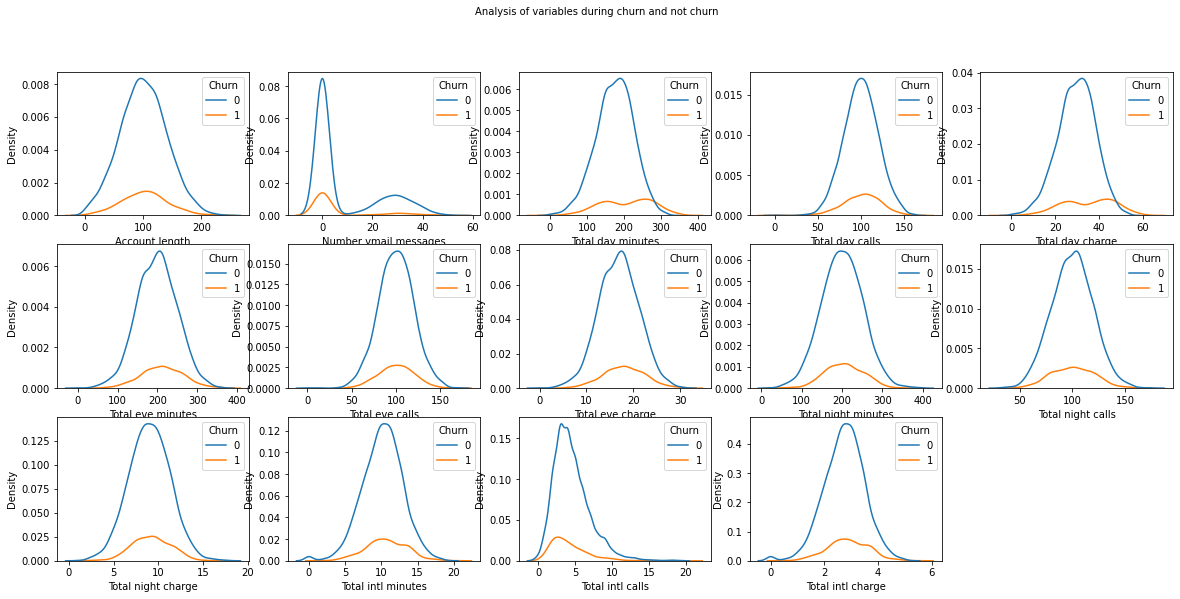

In [ ]:
#finding the distribution of variables for Churned and not churned customers.
plt.figure(figsize=(20,9))
plt.suptitle('Analysis of variables during churn and not churn', fontsize=10)
for i in range(0, len(Numerical_featuress)):
  plt.subplot(3,5,i+1)
  sns.kdeplot(x=telecom_df[Numerical_featuress[i]], hue =telecom_df['Churn'] , fill=False)

Conclusions from the above plot
*   When total day minutes is greater than 300 Churn is high.
*   When total day charge is greater than approximately 50 then the churn is high
*   There are only two variables who have a significant effect on the target variable i.e. Churn, all the other variables are contributing very negligible in the Churn of the customers.



**Univeriate analysis of categorical variables**

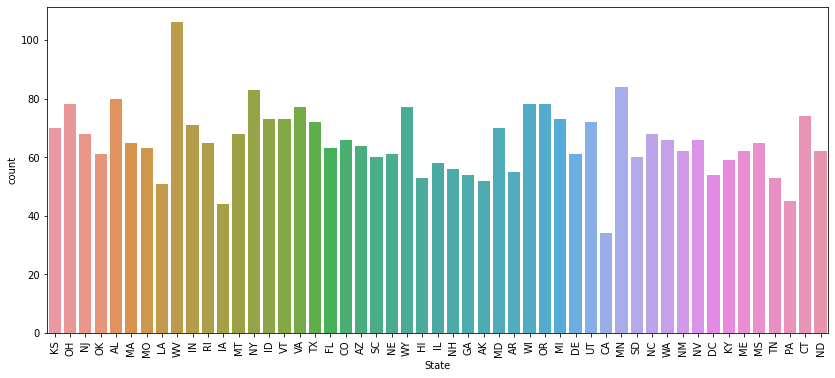

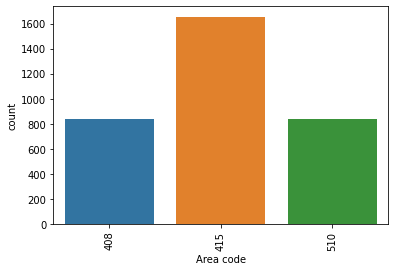

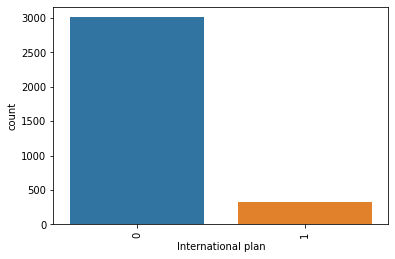

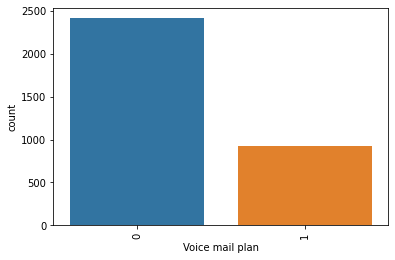

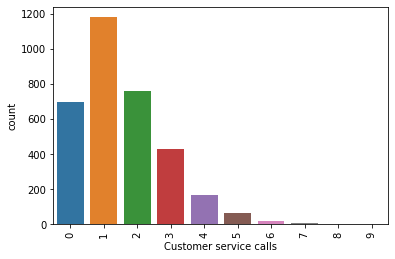

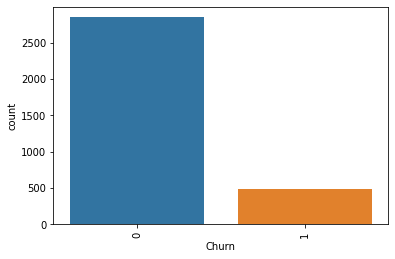

In [ ]:
plt.figure(figsize=(14,6))
for i in range(0, len(catogorical_features)):
  ax=sns.countplot(x=telecom_df[catogorical_features[i]])
  plt.xlabel(catogorical_features[i])
  plt.xticks(rotation=90)
  plt.show()
  



Conclusions from the above plots
*   WV and CA are the states from where maximum and minimum customers are coming respectively.
*   Maximum customers called Customer service for only 1 time and there are very few customers who called more than 4 times.
*   Maximum customers are from area code 415 and other two codes same no. of customers coming.





#**Biaveriate analysis**

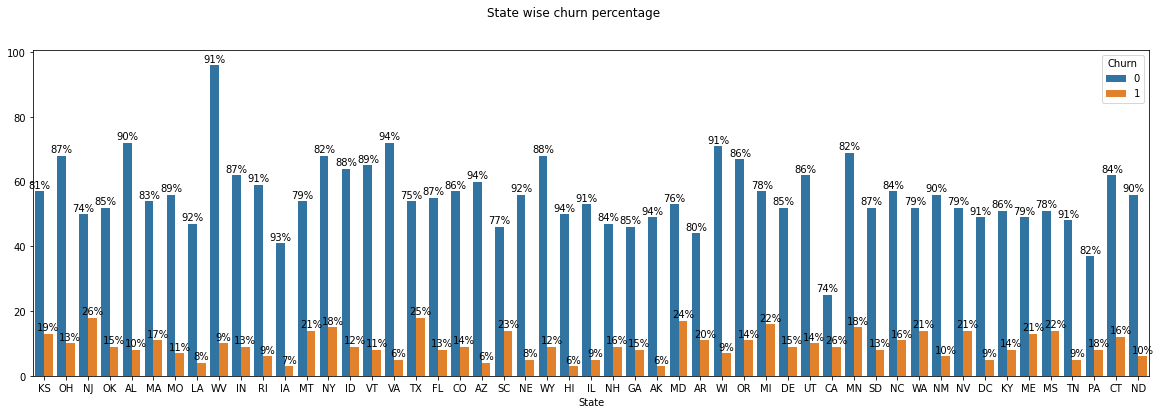

In [ ]:
plt.figure(figsize=(20,6))
a = sns.countplot( x='State',data=telecom_df, hue="Churn")  #countplot of state with churn as hue
a.set_ylabel('')
plt.suptitle('State wise churn percentage')

bars = a.patches
half = int(len(bars)/2) #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #orange color bar
right_bars = bars[half:]  #blue color bar

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of right part
        total = height_l + height_r #combining both the heights of both halfs and finding total height of bars i.e. a.patches

        a.text(left.get_x() + left.get_width()/2, height_l + 1, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre. 
        a.text(right.get_x() + right.get_width()/2, height_r + 1, '{0:.0%}'.format(height_r/total), ha="center")

Conlusions from above plot

*   NJ, CA, TX, MD, SC in this states Churn rate is very hight i.e out of 100% customers in this state 23-26% customers are churning
*   AZ, IA, HI, AK, VA in this states Churn rate is quite low i.e. out of 100% customers in this state only 6-7% customers are churning



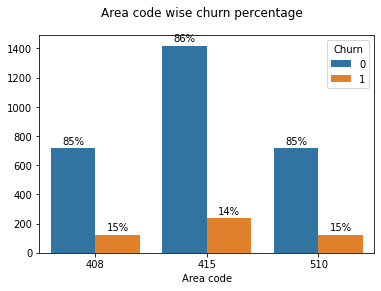

In [ ]:
plt.figure(figsize=(6,4))
a = sns.countplot( x='Area code',data=telecom_df, hue="Churn")
a.set_ylabel('')
plt.suptitle('Area code wise churn percentage')

bars = a.patches  
half = int(len(bars)/2)  #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #orange color bar
right_bars = bars[half:]   #blue color bar

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()  #getting the height of left part
        height_r = right.get_height() #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches

        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

Conclusions from the above plot

*   Churning in 408 and 510 area code is same.
*   Maximum churning is happening in 415 area code which is 14% of total customers in this area code.



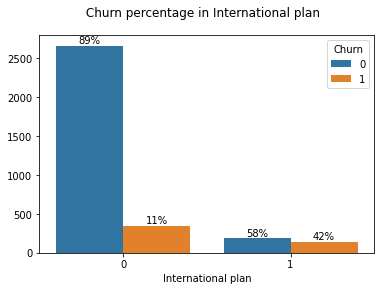

In [ ]:
plt.figure(figsize=(6,4))
a = sns.countplot( x='International plan',data=telecom_df, hue="Churn")
a.set_ylabel('')
plt.suptitle(' Churn percentage in International plan')

bars = a.patches
half = int(len(bars)/2)       #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #orange color bar
right_bars = bars[half:]   #blue color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches


        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

Conclusions from the above plot

*   Having ineternational plan has significant impact on churning. 42% of the total custmers who has international plan are churning.
*   Maximum customers in our dataset has no international plan.



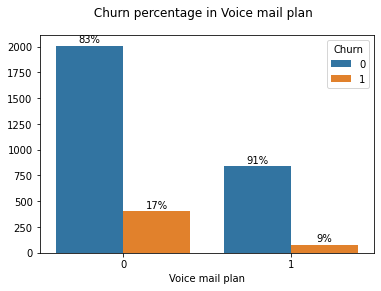

In [ ]:
plt.figure(figsize=(6,4))
a = sns.countplot( x='Voice mail plan',data=telecom_df, hue="Churn")
a.set_ylabel('')
plt.suptitle(' Churn percentage in Voice mail plan')

bars = a.patches
half = int(len(bars)/2)    #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #orange color bar
right_bars = bars[half:]   #blue color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()   #getting the height of left part
        height_r = right.get_height()  #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches

        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center") #ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

Conclusions from the above plot

*   Voice mail mplan variable has not significant impact on churning, because only 9% of all thecustomers who has buyed voice mail plan has churned.




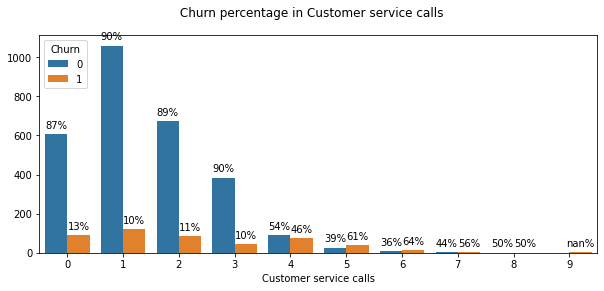

In [ ]:
plt.figure(figsize=(10,4))
a = sns.countplot( x='Customer service calls',data=telecom_df, hue="Churn")
a.set_ylabel('')
plt.suptitle(' Churn percentage in Customer service calls')

bars = a.patches
half = int(len(bars)/2)    #this will divide the a.patches into 2 equal parts(blue and orange) 
left_bars = bars[:half]  #orange color bar
right_bars = bars[half:]   #blue color bar


for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()      #getting the height of left part
        height_r = right.get_height()    #getting the height of rigtht part
        total = height_l + height_r    #combining both the heights of both halfs and finding total height of bars i.e. a.patches

        a.text(left.get_x() + left.get_width()/2., height_l + 30, '{0:.0%}'.format(height_l/total), ha="center")#ploting percentages on top of the bars and at centre.
        a.text(right.get_x() + right.get_width()/2., height_r + 30, '{0:.0%}'.format(height_r/total), ha="center")

Conclusions from the above plott

*   High customer service calls has highimpact on the churning
*   If the customers are calling 4 or more than 4 times to customer service centre, then their is more than 50% chance than they will churn.



#**Multivariate analysis**

In [ ]:
correlation=telecom_df.corr()  #corrilation between two variables
correlation

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


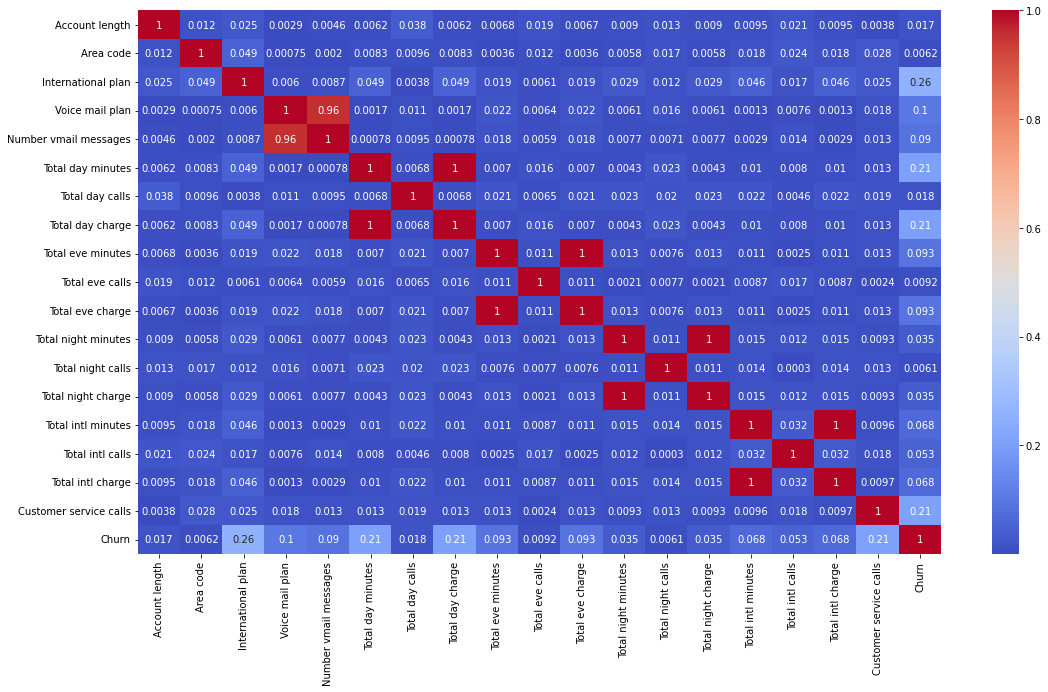

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From the above heatmap we can conclude that the most corrilated variables with our target variable i.e. Churn are International plan, Total day minutes, Total day charge and Customer service calls.

In [ ]:
NOIP_DF = telecom_df.loc[telecom_df['International plan'] == 0] #dataframe of those customers who has no international plan
NOIP_DF['intl_charge_per_min'] = NOIP_DF['Total intl charge']/NOIP_DF['Total intl minutes']
NOIP_DF.describe()

<ipython-input-43-f3691bfee8c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOIP_DF['intl_charge_per_min'] = NOIP_DF['Total intl charge']/NOIP_DF['Total intl minutes']


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,intl_charge_per_min
count,3010.000000,3010.000000,3010.0,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,2992.000000
mean,100.742193,436.508638,0.0,0.275748,8.059801,178.893887,100.410963,30.412495,200.663090,100.074419,17.056565,201.350831,100.027907,9.060877,10.195349,4.465449,2.753279,1.573422,0.114950,0.270059
std,39.968207,41.990766,0.0,0.446964,13.650838,54.141286,19.964447,9.203983,50.474772,20.092817,4.290345,50.366837,19.589605,2.266526,2.798937,2.442486,0.755716,1.312855,0.319015,0.000332
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268182
25%,73.000000,408.000000,0.0,0.000000,0.000000,143.300000,87.250000,24.360000,166.050000,87.000000,14.115000,167.600000,87.000000,7.540000,8.400000,3.000000,2.270000,1.000000,0.000000,0.269811
50%,100.000000,415.000000,0.0,0.000000,0.000000,179.000000,101.000000,30.430000,201.350000,100.000000,17.115000,201.850000,100.000000,9.085000,10.200000,4.000000,2.750000,1.000000,0.000000,0.270000
75%,127.000000,415.000000,0.0,1.000000,19.750000,214.900000,114.000000,36.530000,235.175000,114.000000,19.987500,235.500000,113.000000,10.600000,12.100000,6.000000,3.270000,2.000000,0.000000,0.270297
max,243.000000,510.000000,0.0,1.000000,51.000000,350.800000,165.000000,59.640000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,9.000000,1.000000,0.272727


In [ ]:
IP_DF= telecom_df.loc[telecom_df['International plan'] == 1] #dataframe of those customers who has international plan
IP_DF['intl_charge_per_min'] = IP_DF['Total intl charge']/IP_DF['Total intl minutes']
IP_DF.describe()

<ipython-input-42-a44a4354b704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IP_DF['intl_charge_per_min'] = IP_DF['Total intl charge']/IP_DF['Total intl minutes']


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,intl_charge_per_min
count,323.000000,323.000000,323.0,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,104.071207,443.461300,1.0,0.284830,8.464396,187.986997,100.665635,31.958390,203.936842,100.486068,17.334923,196.410217,100.851393,8.838483,10.628173,4.609907,2.869907,1.464396,0.424149,0.270038
std,38.363388,45.355198,0.0,0.452034,14.049639,56.850451,21.050065,9.664671,52.879435,18.285239,4.494749,52.333632,19.386144,2.355342,2.697787,2.629768,0.728151,1.337863,0.494980,0.000300
min,2.000000,408.000000,1.0,0.000000,0.000000,12.500000,42.000000,2.130000,60.800000,50.000000,5.170000,72.400000,48.000000,3.260000,1.300000,1.000000,0.350000,0.000000,0.000000,0.269231
25%,79.500000,415.000000,1.0,0.000000,0.000000,148.200000,85.500000,25.190000,167.750000,88.000000,14.255000,156.500000,88.000000,7.040000,9.000000,3.000000,2.430000,0.000000,0.000000,0.269801
50%,104.000000,415.000000,1.0,0.000000,0.000000,188.900000,103.000000,32.110000,202.900000,100.000000,17.250000,196.200000,100.000000,8.830000,10.800000,4.000000,2.920000,1.000000,0.000000,0.270000
75%,132.500000,510.000000,1.0,1.000000,20.000000,228.650000,117.000000,38.870000,239.300000,114.000000,20.345000,232.800000,114.000000,10.475000,12.200000,6.000000,3.290000,2.000000,1.000000,0.270259
max,224.000000,510.000000,1.0,1.000000,45.000000,346.800000,146.000000,58.960000,363.700000,159.000000,30.910000,352.500000,154.000000,15.860000,20.000000,20.000000,5.400000,9.000000,1.000000,0.271429


If we observe above two describe's of 'NOIP_DF' and 'IP_DF' when we find the intl charges per min for both the data's we get same number i.e. 0.270 charge/min.
So here we can conclude that the customers who are buying international plans are not getting any benifit on their international charge per min. Hence this might be the major reason behind the Churning as from the bivariate analysis of international plan and Churn variable we have seen that out off all the customers who are buying intl plan 42% of them are churning.

In [ ]:
NOTCHURNED_DF = telecom_df.loc[telecom_df['Churn'] == 0]  #dataframe of those customers who has not churned
CHURNED_DF = telecom_df.loc[telecom_df['Churn'] == 1]  #dataframe of those customers who has churned

In [ ]:
NOTCHURNED_DF['charge_per_min_day'] = NOTCHURNED_DF['Total day charge']/NOTCHURNED_DF['Total day minutes']
NOTCHURNED_DF['charge_per_min_eve'] = NOTCHURNED_DF['Total eve charge']/NOTCHURNED_DF['Total eve minutes']
NOTCHURNED_DF['charge_per_min_night'] = NOTCHURNED_DF['Total night charge']/NOTCHURNED_DF['Total night minutes']
NOTCHURNED_DF['charge_per_min_intl'] = NOTCHURNED_DF['Total intl charge']/NOTCHURNED_DF['Total intl minutes']

<ipython-input-30-e698da04b702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOTCHURNED_DF['charge_per_min_day'] = NOTCHURNED_DF['Total day charge']/NOTCHURNED_DF['Total day minutes']
<ipython-input-30-e698da04b702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOTCHURNED_DF['charge_per_min_eve'] = NOTCHURNED_DF['Total eve charge']/NOTCHURNED_DF['Total eve minutes']
<ipython-input-30-e698da04b702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
CHURNED_DF['charge_per_min_day'] = CHURNED_DF['Total day charge']/CHURNED_DF['Total day minutes']
CHURNED_DF['charge_per_min_eve'] = CHURNED_DF['Total eve charge']/CHURNED_DF['Total eve minutes']
CHURNED_DF['charge_per_min_night'] = CHURNED_DF['Total night charge']/CHURNED_DF['Total night minutes']
CHURNED_DF['charge_per_min_intl'] = CHURNED_DF['Total intl charge']/CHURNED_DF['Total intl minutes']

<ipython-input-39-2e8236513a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHURNED_DF['charge_per_min_day'] = CHURNED_DF['Total day charge']/CHURNED_DF['Total day minutes']
<ipython-input-39-2e8236513a99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHURNED_DF['charge_per_min_eve'] = CHURNED_DF['Total eve charge']/CHURNED_DF['Total eve minutes']
<ipython-input-39-2e8236513a99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [ ]:
NOTCHURNED_DF.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,charge_per_min_day,charge_per_min_eve,charge_per_min_night,charge_per_min_intl
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,...,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.0,2849.000000,2849.000000,2850.000000,2832.000000
mean,100.793684,437.074737,0.065263,0.295439,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,...,9.006074,10.158877,4.532982,2.743404,1.449825,0.0,0.170003,0.085001,0.045000,0.270057
std,39.882350,42.306156,0.247033,0.456320,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,...,2.299768,2.784489,2.441984,0.751784,1.163883,0.0,0.000029,0.000016,0.000017,0.000333
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.040000,0.000000,0.000000,0.000000,0.000000,0.0,0.169231,0.084936,0.044828,0.268182
25%,73.000000,408.000000,0.000000,0.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,...,7.470000,8.400000,3.000000,2.270000,1.000000,0.0,0.169989,0.084988,0.044988,0.269811
50%,100.000000,415.000000,0.000000,0.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,...,9.010000,10.200000,4.000000,2.750000,1.000000,0.0,0.170004,0.085000,0.045000,0.270000
75%,127.000000,510.000000,0.000000,1.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,...,10.570000,12.000000,6.000000,3.240000,2.000000,0.0,0.170017,0.085013,0.045013,0.270297
max,243.000000,510.000000,1.000000,1.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,...,17.770000,18.900000,19.000000,5.100000,8.000000,0.0,0.170513,0.085075,0.045111,0.272727


In [ ]:
CHURNED_DF.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,charge_per_min_day,charge_per_min_eve,charge_per_min_night,charge_per_min_intl
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,...,483.000000,483.00000,483.000000,483.000000,483.000000,483.0,482.000000,483.000000,483.000000,483.000000
mean,102.664596,437.817805,0.283644,0.165631,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,...,9.235528,10.70000,4.163561,2.889545,2.229814,1.0,0.170003,0.085001,0.045000,0.270055
std,39.467820,42.792270,0.451233,0.372135,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,...,2.121081,2.79319,2.551575,0.754152,1.853275,0.0,0.000018,0.000016,0.000016,0.000302
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,...,2.130000,2.00000,1.000000,0.540000,0.000000,1.0,0.169926,0.084952,0.044937,0.269048
25%,76.000000,408.000000,0.000000,0.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,...,7.705000,8.80000,2.000000,2.380000,1.000000,1.0,0.169990,0.084989,0.044988,0.269828
50%,103.000000,415.000000,0.000000,0.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,...,9.220000,10.60000,4.000000,2.860000,2.000000,1.0,0.170004,0.085000,0.045000,0.270068
75%,127.000000,510.000000,1.000000,0.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,...,10.795000,12.80000,5.000000,3.460000,4.000000,1.0,0.170014,0.085013,0.045013,0.270270
max,225.000000,510.000000,1.000000,1.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,...,15.970000,20.00000,20.000000,5.400000,9.000000,1.0,0.170108,0.085049,0.045043,0.271111


Conclusion from the above two discripion of 'NOTCHURNED_DF' and 'CHURNED_DF' is charge per min day/eve/night/intl has no significant impact on churning because for both type of customers i.e. who has churned and who has not churned the charges per min are same.



##**Final Conclusion**

*   There is impact of total day minutes and total day charge on the churn because in our kdeplot analysis we have seen that when day minutes and day charge are higher than 300 and 50 respectively the churn is happening. In heatmap also corrilation is present between Churn and two variables mentioned earlier.
*   NJ, CA, TX, MD, SC in this states Churn rate is very hight i.e out of 100% customers in this state 23-26% customers are churning.
*   AZ, IA, HI, AK, VA in this states Churn rate is quite low i.e. out of 100% customers in this state only 6-7% customers are churning.
*   Having international plan has significant impact on churning. 42% of the total custmers who has international plan are churning. The reason behind this as per analysis is no beneift on charge per min for international plan buyers.
*   High customer service calls has high impact on the churning. If the customers are calling 4 or more than 4 times to customer service centre, then their is more than 50% chance than they will churn.







##**Recommendations**

 Our recommendations will be to focus on the below points.

*   States where the churn rate is very high
*   Should think about the day charge per min on calls because the day charge per min rate is higher than night and evening charge per min.
*   We should also focus on those cusomers who have international plan because this customers are not getting benefit in termas of charge per min on their internatinal calls
*   We should focus more on the customers who are cnnecting with service centre more than 4 times because there is a chance that they are facing any problems thats why they are connecting with service centre. Because they are the high risk customers. We can provide offers to this customers so that the risk of churning could reduce.



